## Extract, Transform and load data

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported success")


Imported success


In [11]:
# Load in the Dataset
sales_data = pd.read_excel("eletronic_sales.xlsx")
sales_data.head()

sales_data.info()
sales_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         43 non-null     datetime64[ns]
 1   Branch       43 non-null     object        
 2   Sales Agent  43 non-null     object        
 3   Products     43 non-null     object        
 4   Units        43 non-null     int64         
 5   Price        43 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.1+ KB


,Date,Units,Price
count,43,43.000000,43.000000
mean,2014-12-29 00:00:00,49.325581,20.308605
min,2014-01-06 00:00:00,2.000000,1.290000
25%,2014-07-03 12:00:00,27.500000,3.990000
50%,2014-12-29 00:00:00,53.000000,4.990000
75%,2015-06-25 12:00:00,74.500000,17.990000
max,2015-12-21 00:00:00,96.000000,275.000000
std,NaN,30.078248,47.345118


In [12]:
# View a snapshot of dataset
sales_data.head()

,Date,Branch,Sales Agent,Products,Units,Price
0,2014-09-01,Woji,Chinedu,Apple,2,125.00
1,2015-06-17,Woji,Emeka,Apple,5,125.00
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29
3,2015-11-17,Woji,Tolu,HP,11,4.99
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29


In [13]:
# Performing feature engineering
# Adding the revenue column
sales_data["Revenue"] = sales_data["Units"] * sales_data["Price"]

# roung(parameter, 2)
sales_data["Revenue(N)"] = round(sales_data["Units"] * sales_data["Price"] * 1000, 2)

sales_data.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N)
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0


In [14]:
# Checking the data types
sales_data.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue               float64
Revenue(N)            float64
dtype: object

In [15]:
# Conveting the date column to datetime

# to_datetime()
sales_data["Date"] = pd.to_datetime(sales_data["Date"])
sales_data.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue               float64
Revenue(N)            float64
dtype: object

<Axes: xlabel='Sales Agent', ylabel='Product'>

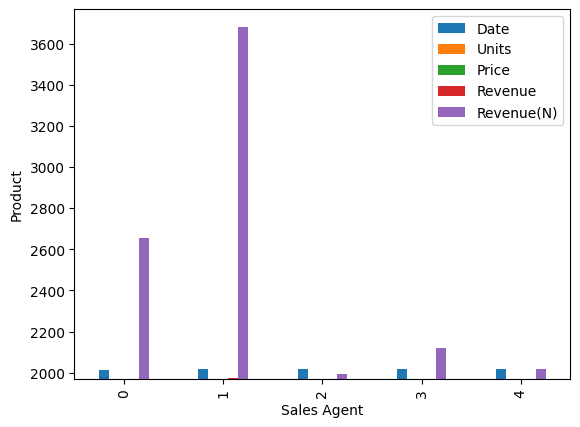

In [16]:
# Plotting
# sales_data.dtypes.value_counts().plot(kind="bar", xlabel="Data Types", ylabel= "Count")
few = sales_data.iloc[0:5]

few.plot(kind="bar", xlabel="Sales Agent", ylabel= "Product")

In [17]:
# Doing more feature engineering
# Working on date and time to eatract the month, year and week name

sales_data["Year"] = sales_data["Date"].dt.year
sales_data["Month"] = sales_data["Date"].dt.month_name()
sales_data["Week"] = sales_data["Date"].dt.day_name()

sales_data.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Week
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday


## Working on the KPI

#### A.

In [31]:
# 1. Total Units sold

total_goods_sold = sales_data["Units"].sum()
print(f"The total unit of goods sold: {total_goods_sold}")

The total unit of goods sold: 2121


In [ ]:
# 2. Total Revnue
total_revenue = sales_data["Revenue(N)"].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 19627880.0


In [ ]:
# 3. Average revenue per unit
# Using the "round() function to approximate to 2 decimal place"
average_rev_per_unit = round(total_revenue / total_goods_sold, 2)
print(f"Average Revenue per unit: {average_rev_per_unit}")

Average Revenue per unit: 9254.07


In [38]:
# 4. Numbers of products
#  using the nunique() shows the number of unique values
numbers_of_products = sales_data["Products"].nunique()
print(f"Numbers of Products: {numbers_of_products}")

Numbers of Products: 5


In [18]:
# 5. Number of Sales Agents
numbers_of_sales_agents = sales_data["Sales Agent"].nunique()
print(f"Number of Sales Agents: {numbers_of_sales_agents}")

Number of Sales Agents: 11


#### B. Working on the insights by creating models

In [19]:
# Set index using the date column
sales_data.set_index("Date")

,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Week
Date,,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539.73,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251.72,251720.0,2014,October,Sunday
2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0,2015,December,Monday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179.64,179640.0,2014,February,Sunday


In [20]:
sales_data.Year.unique()

array([2014, 2015], dtype=int32)

In [21]:
sales_2015 = sales_data[sales_data["Year"] == 2015]

# Filtering
# Grouping
# Visuals

# Monthly revenue in 2015
sales_2015 = sales_data[sales_data["Year"] == 2015]
sales_2015.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Week
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday
7,2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0,2015,December,Monday


In [22]:
# Using the .sortindex() to arrange output, so the arrangement is done based on index
total_monthly_revenue = sales_2015.groupby("Month")["Revenue(N)"].sum().sort_index()
total_monthly_revenue

Month
April         610380.0
August       1830900.0
December     2018780.0
February     1324960.0
January       413540.0
July          996330.0
June          625000.0
March         389430.0
May           787570.0
November       54890.0
October      1157490.0
September     160270.0
Name: Revenue(N), dtype: float64

In [28]:
# Using the .sort_value()to arrange based on values
total_monthly_revenue = sales_2015.groupby("Month")["Revenue(N)"].sum().sort_values(ascending= False)
total_monthly_revenue

Month
December     2018780.0
August       1830900.0
February     1324960.0
October      1157490.0
July          996330.0
May           787570.0
June          625000.0
April         610380.0
January       413540.0
March         389430.0
September     160270.0
November       54890.0
Name: Revenue(N), dtype: float64

<Axes: xlabel='Month', ylabel='Revenue(N)'>

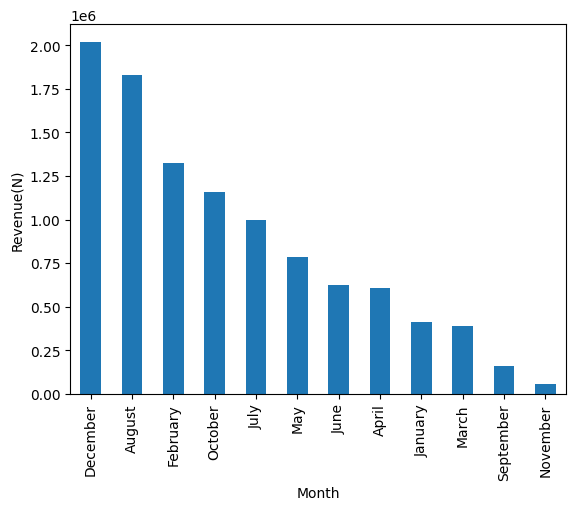

In [29]:
# Putting in a plot in pandas
total_monthly_revenue.plot(kind="bar", xlabel= "Month", ylabel="Revenue(N)")

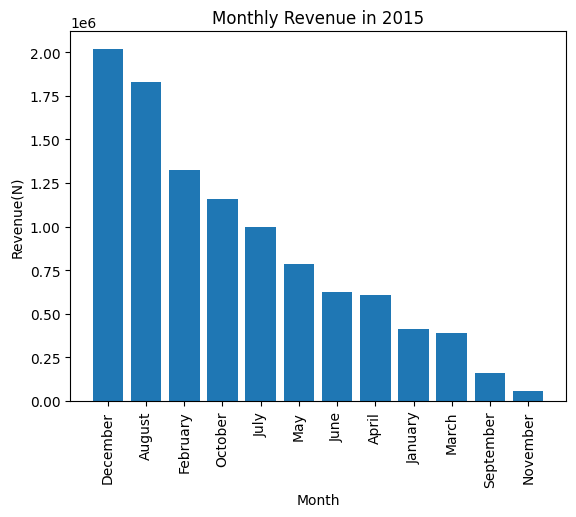

In [34]:
# Lets use matplotlib
plt.bar(total_monthly_revenue.index, total_monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Revenue(N)")
plt.title("Monthly Revenue in 2015")
plt.xticks(rotation = 90)
plt.show()